# 04_Clustering.ipynb

## 1. Load features
## 2. Scale features
## 3. Determine optimal k (elbow + silhouette)
## 4. Fit K‑Means and assign segments
## 5. Save segments to `data/processed/customer_segments.csv`


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load features
feats = pd.read_csv("../data/processed/features.csv")

# 2️⃣ Scale numeric features
numeric_cols = ["orders_7d", "orders_30d", "recency_days"]
scaler = StandardScaler()
X = scaler.fit_transform(feats[numeric_cols])


Text(0.5, 1.0, 'Silhouette Scores')

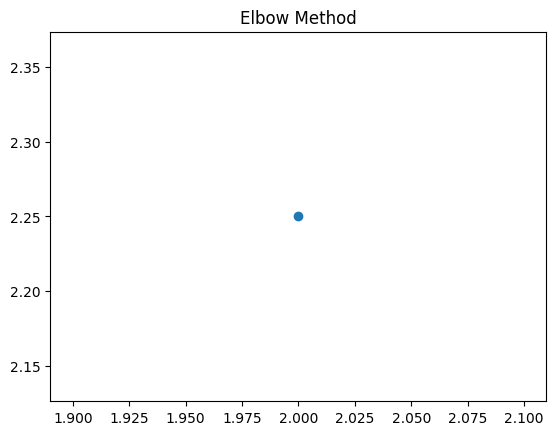

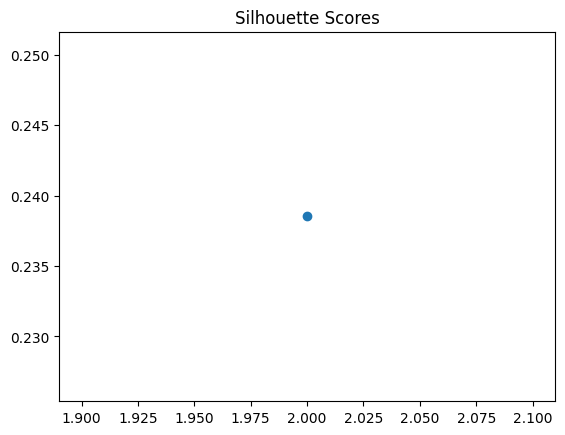

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

inertias, silhouettes = [], []
K = range(2, min(len(X), 7))   # never try more clusters than samples

for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)
    
    # only compute silhouette if every cluster has at least 1 point
    labels = km.labels_
    unique, counts = np.unique(labels, return_counts=True)
    if len(unique) == k and np.all(counts > 0):
        silhouettes.append(silhouette_score(X, labels))
    else:
        silhouettes.append(np.nan)  # placeholder

# Plot
plt.figure()
plt.plot(list(K), inertias, marker="o")
plt.title("Elbow Method")

plt.figure()
plt.plot(list(K), silhouettes, marker="o")
plt.title("Silhouette Scores")


In [4]:
from sklearn.cluster import KMeans

# 4️⃣ Fit final K‑Means and assign segment labels
k_opt = 2
kmeans = KMeans(n_clusters=k_opt, random_state=42).fit(X)
feats['segment'] = kmeans.labels_

# 5️⃣ Persist customer segments
import os
os.makedirs("../data/processed", exist_ok=True)
feats[["customer_id", "segment"]].to_csv(
    "../data/processed/customer_segments.csv", index=False
)

print("Customer segments saved to ../data/processed/customer_segments.csv")


Customer segments saved to ../data/processed/customer_segments.csv
